<a href="https://colab.research.google.com/github/Anjinhyoung/TIL-Today-I-Learned/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Logistic_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
hr_df = pd.read_csv('/content/drive/MyDrive/4.머신러닝/Data/hr.csv')
hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


* employee_id: 임의의 직원 아이디
* department: 부서
* region: 지역
* education: 학력
* gender: 성별
* recruitment_channel: 채용 방법
* no_of_trainings: 트레이닝 받은 횟수
* age: 나이
* previous_year_rating: 이전 년도 고과 점수
* length_of_service: 근속 년수
* awards_won: 수상 경력
* avg_training_score: 평균 고과 점수
* is_promoted: 승진 여부

In [6]:
hr_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

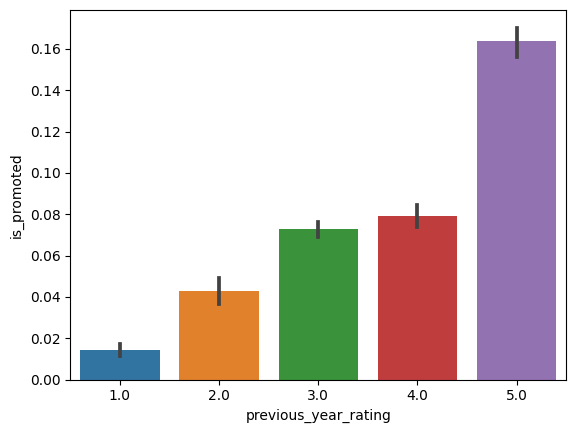

In [7]:
sns.barplot(x='previous_year_rating',y='is_promoted',data=hr_df)

<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

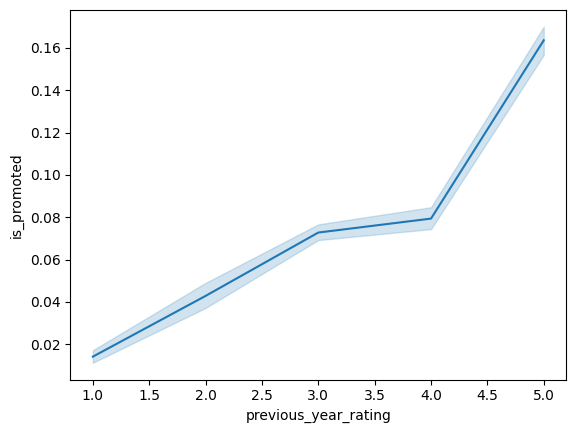

In [8]:
sns.lineplot(x='previous_year_rating',y='is_promoted',data=hr_df)

<Axes: xlabel='avg_training_score', ylabel='is_promoted'>

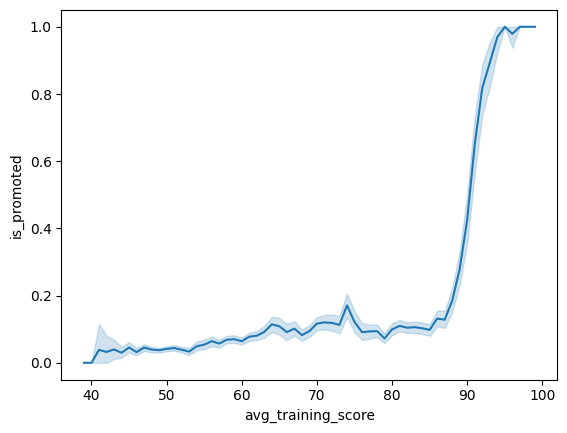

In [9]:
sns.lineplot(x='avg_training_score',y='is_promoted',data=hr_df)

<Axes: xlabel='recruitment_channel', ylabel='is_promoted'>

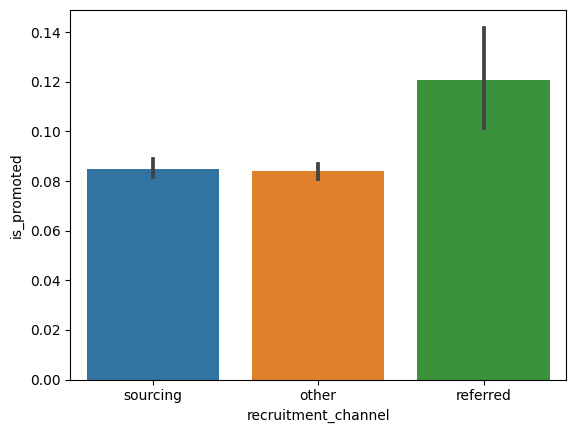

In [10]:
sns.barplot(x='recruitment_channel',y='is_promoted',data=hr_df)
# 중간에 선은 '편차' 선이 길면 '편차'가 크다. 편차가 크면 데이터가 적다.
# 선 = '심지'라고 한다.
# sns로 봐야 심지가 나온데 plt로 보면 안 나온다.

In [11]:
# 진짜로 그런지 한 번 보기
hr_df['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

<Axes: xlabel='gender', ylabel='is_promoted'>

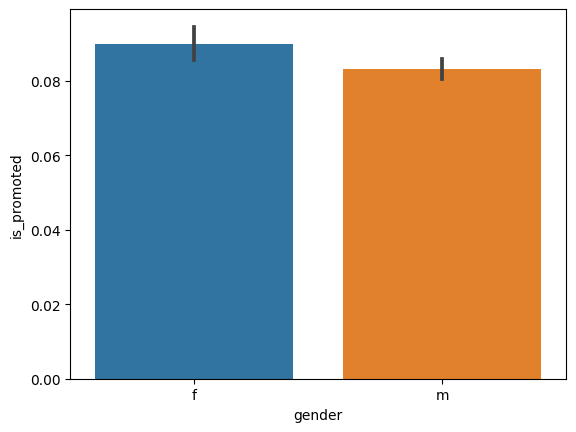

In [12]:
sns.barplot(x='gender',y='is_promoted',data=hr_df)
# 여성의 심지가 더 큼

In [13]:
# 한 번 확인 해 보기
hr_df['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Analytics'),
  Text(4, 0, 'R&D'),
  Text(5, 0, 'Procurement'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'HR'),
  Text(8, 0, 'Legal')])

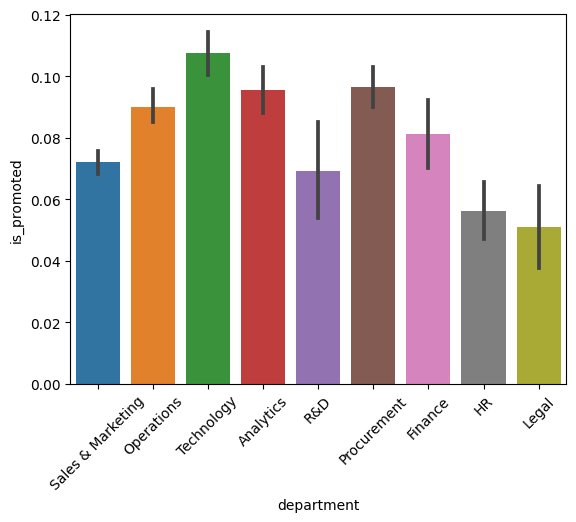

In [14]:
sns.barplot(x='department',y='is_promoted',data=hr_df)
plt.xticks(rotation=45)

In [15]:
hr_df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'region_7'),
  Text(1, 0, 'region_22'),
  Text(2, 0, 'region_19'),
  Text(3, 0, 'region_23'),
  Text(4, 0, 'region_26'),
  Text(5, 0, 'region_2'),
  Text(6, 0, 'region_20'),
  Text(7, 0, 'region_34'),
  Text(8, 0, 'region_1'),
  Text(9, 0, 'region_4'),
  Text(10, 0, 'region_29'),
  Text(11, 0, 'region_31'),
  Text(12, 0, 'region_15'),
  Text(13, 0, 'region_14'),
  Text(14, 0, 'region_11'),
  Text(15, 0, 'region_5'),
  Text(16, 0, 'region_28'),
  Text(17, 0, 'region_17'),
  Text(18, 0, 'region_13'),
  Text(19, 0, 'region_16'),
  Text(20, 0, 'region_25'),
  Text(21, 0, 'region_10'),
  Text(22, 0, 'region_27'),
  Text(23, 0, 'region_30'),
  Text(24, 0, 'region_12'),
  Text(25, 0, 'region_21'),
  Text(26, 0, 'region_8'),
  Text(27, 0, 'region_32'),
  Text(28, 0, 'region_6'),
  Text(29, 0, 'region_33'),
  Text(30, 0, 'region_2

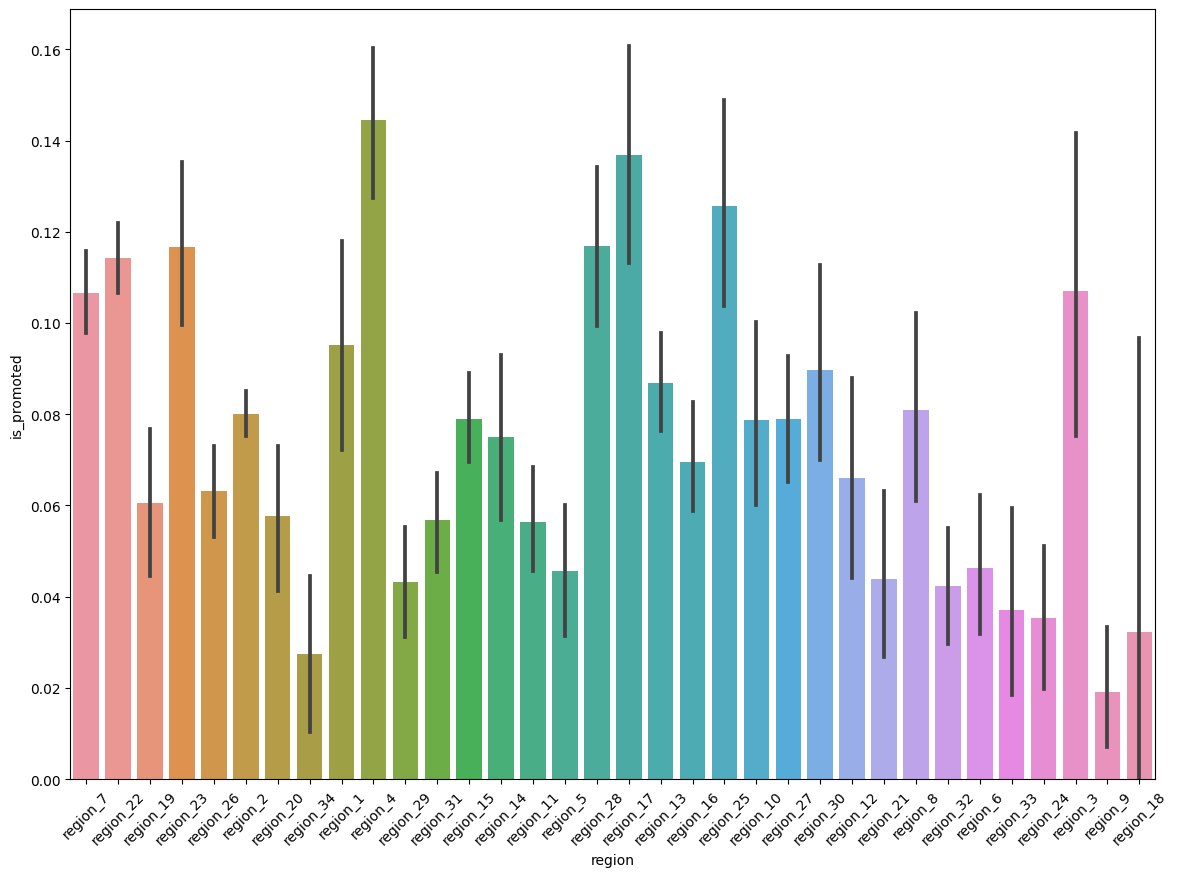

In [16]:
plt.figure(figsize=(14,10))
sns.barplot(x='region',y='is_promoted',data=hr_df)
plt.xticks(rotation=45)

In [17]:
hr_df.isna().mean()

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [18]:
hr_df['education'].value_counts()
# Bachelor's :학사
# Master's & above: 석사
# Below Secondary: 고졸 이하
# nan있음 안 나타나서 그렇지

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [19]:
hr_df['previous_year_rating'].value_counts()
# nan있음 안 나타나서 그렇지

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [20]:
hr_df = hr_df.dropna() # 결측치 있는 열 제거

In [21]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  awards_won?           48660 non-null  int64  
 11  avg_training_score    48660 non-null  int64  
 12  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [22]:
for i in ['department', 'region', 'education', 'gender', 'recruitment_channel']:
    print(i, hr_df[i].nunique())

department 9
region 34
education 3
gender 2
recruitment_channel 3


In [23]:
hr_df = pd.get_dummies(hr_df, columns=['department', 'region', 'education', 'gender', 'recruitment_channel'])
hr_df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,0,49,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,50,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,50,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,73,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [24]:
pd.set_option('display.max_columns',60)

In [25]:
hr_df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    hr_df.drop('is_promoted',axis=1),hr_df['is_promoted'],test_size=0.2,
    random_state = 2023
)